In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))


In [2]:
import plotly.express as px

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.shape)

df.head()


(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info() #No Missing Values and Correct data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
plt.style.use('fivethirtyeight')

In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [9]:
fig = px.pie(
    data_frame=df, 
    names='Gender', 
    title='Customer Genders', 
    hole=0.1, 
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.show() #Female customers are on 6% more then males. Virtually even distribution

In [10]:
fig = px.histogram(df['Annual Income (k$)'], 
             title='Distribution of Annual Income (k$)', marginal='violin',
            color_discrete_sequence=['green'])

fig.update_layout( xaxis_title_text='Annual Income (k$)',
    yaxis_title_text='Frequency', bargap=0.03, showlegend=False) #Most people earn between 40K and 80K

In [11]:
fig = px.histogram(df['Age'], 
             title='Distribution of Age', marginal='violin',
            color_discrete_sequence=['green'])

fig.update_layout( xaxis_title_text='Age',
    yaxis_title_text='Frequency', bargap=0.03, showlegend=False) #Most people lie b/w age 20 and 55

In [12]:
fig = px.histogram(df['Spending Score (1-100)'], 
             title='Distribution of Spending Score (1-100)', marginal='violin',
            color_discrete_sequence=['green'])

fig.update_layout( xaxis_title_text='Spending Score (1-100)',
    yaxis_title_text='Frequency', bargap=0.03, showlegend=False) #Spendimg score of most of the people is b/w 40 and 80

In [13]:
conda install seaborn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


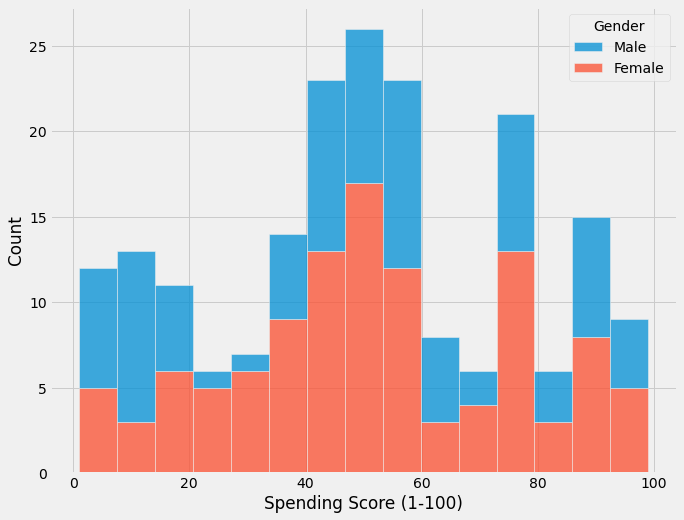

In [14]:
plt.figure(figsize=(10, 8))

sns.histplot(data=df, x='Spending Score (1-100)', hue='Gender', multiple='stack',bins=15);

# Spending Scores
## between 0 and 20 (men domintate)
## between 25 and 40 (women domintate)
## between 45 and 60 (women domintate)
## between 65 and 70 (men dominates)
## between 70 and 100 (women dominates)

In [15]:
px.box(df, x='Gender', y= 'Spending Score (1-100)', points='all', color = 'Gender')
# Overall Feamle have high Spending Score

In [16]:
def impute_spending_group(spending_score):
    if spending_score <= 35:
        return 'low'
    if spending_score > 35 and spending_score <= 65:
        return 'medium'
    if spending_score > 65:
        return 'high'

df['SpendingGroup'] = df['Spending Score (1-100)'].apply(impute_spending_group)

In [17]:
px.box(df, x='SpendingGroup', y= 'Age', points='all', color = 'Gender')
# Those who are spending high mostly lies in 20-40 Age Group and variation also is too less

In [18]:
px.box(df, x='SpendingGroup', y= 'Annual Income (k$)', points='all', color = 'Gender')
# It is strange to note that medium spending group's annual income is significantly less than that of low spending group
# and varaition also is too less

<Figure size 1080x360 with 0 Axes>

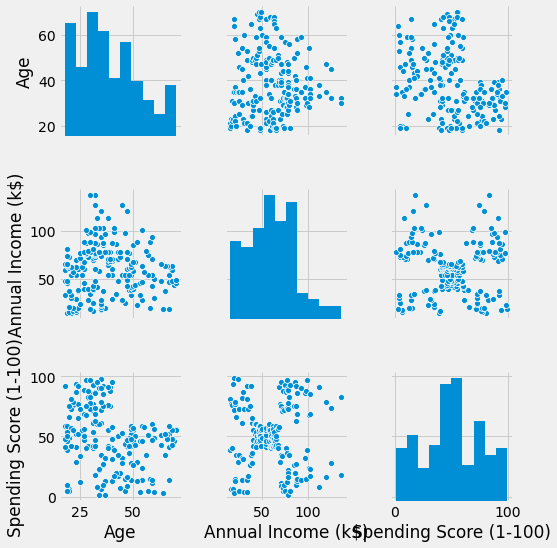

In [29]:
plt.figure(1 , figsize = (15 , 5))
sns.pairplot(df[['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']])
plt.show() #There dosen't seems any relationship

In [30]:
px.scatter(df, x = 'Age' , y = 'Annual Income (k$)', color= 'Gender', size= 'Spending Score (1-100)')

In [31]:
px.scatter(df, x = 'Spending Score (1-100)' , y = 'Annual Income (k$)', color= 'Gender', size= 'Age')
"""five visually recognizable clusters seem to be represent customers that:
have high income and low spending score
low income and low spending score
high income and low spending score
high income and high spending score
dense middle cluster with middle income and middle spending score"""

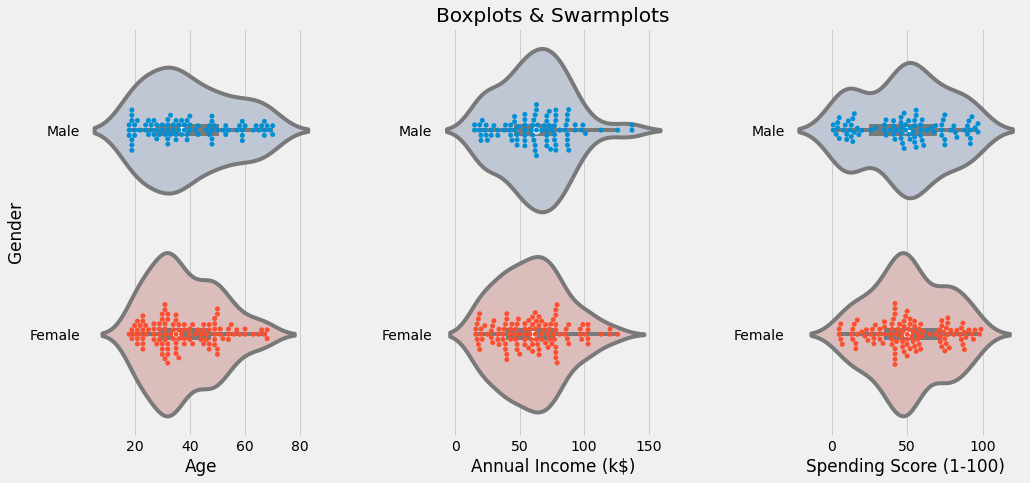

In [34]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df , palette = 'vlag')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

# Clustering using K-Means

##  1.Segmentation using Age and Spending Score

In [35]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

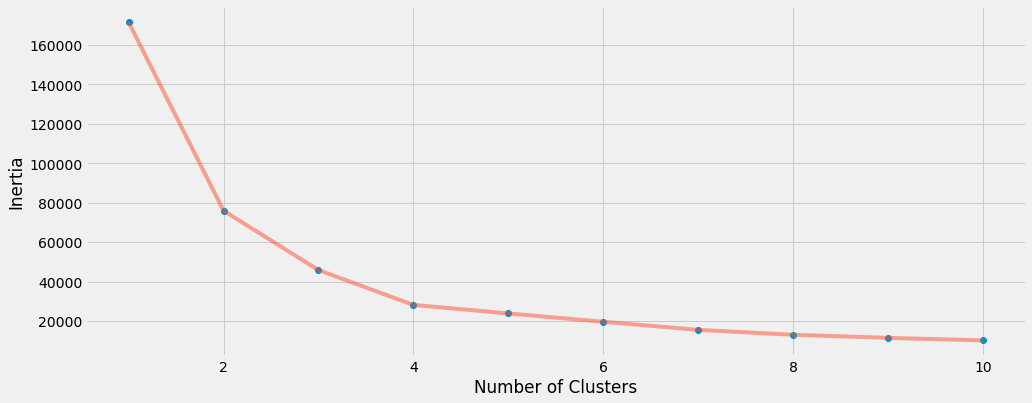

In [36]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show() #So optimum value of K seems to be 4

In [44]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [58]:
centroids1

array([[55.70833333, 48.22916667],
       [30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [27.61702128, 49.14893617]])

In [45]:
y_pred = algorithm.predict(X1)

In [57]:
fig = px.scatter(df, y = 'Spending Score (1-100)' , x = 'Age', color= y_pred, size= 'Annual Income (k$)')



In [59]:
'''Annual Income (k$) and spending Score'''
X1 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

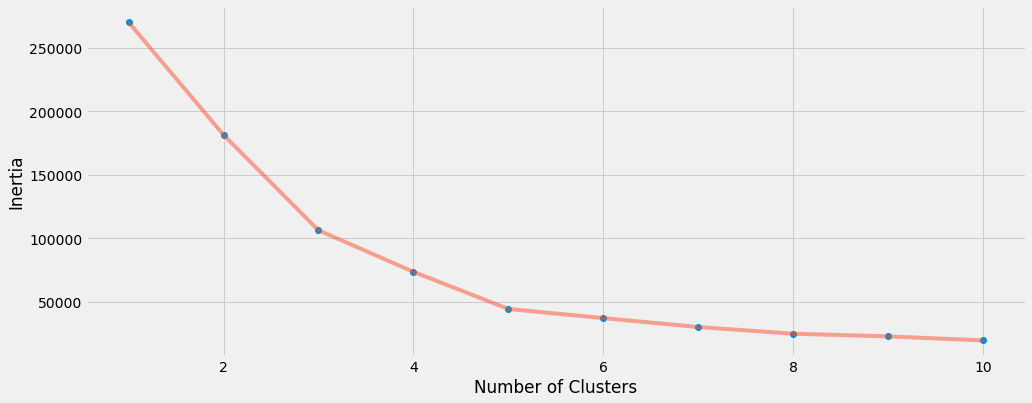

In [60]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show() #So optimum value of K seems to be 5

In [61]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [62]:
centroids1

array([[86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [63]:
y_pred = algorithm.predict(X1)

In [65]:
fig = px.scatter(df, y = 'Spending Score (1-100)' , x = 'Annual Income (k$)', color= y_pred, size= 'Age')
fig



In [20]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

In [21]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 27  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [22]:
y_pred = algorithm.predict(X3)

In [23]:
centroids3

array([[32.69230769, 86.53846154, 82.12820513],
       [56.15555556, 53.37777778, 49.08888889],
       [25.27272727, 25.72727273, 79.36363636],
       [27.        , 56.65789474, 49.13157895],
       [41.68571429, 88.22857143, 17.28571429],
       [44.14285714, 25.14285714, 19.52380952]])

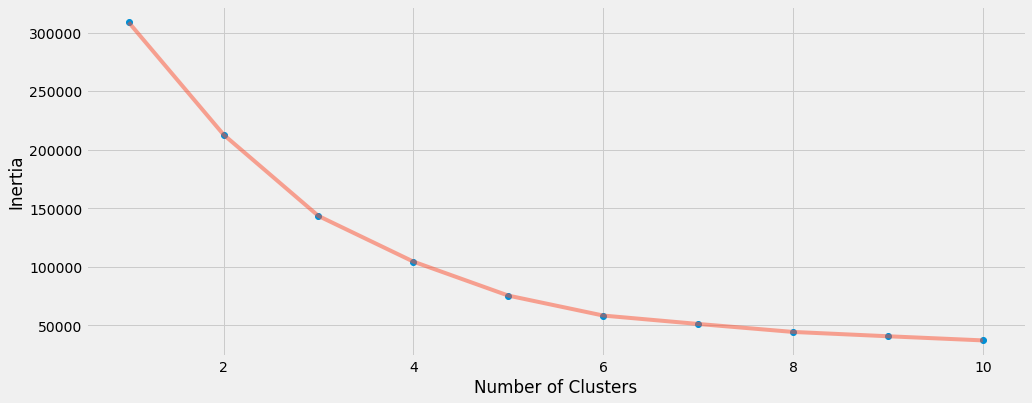

In [24]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show() #Optimum number of clusters seems to be 6

In [26]:
fig = px.scatter_3d(df, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color=y_pred,  opacity=0.7)
fig

# SO In the end we got 6 Clusters
1. Middle Aged, High Income and High Spending Score
2. Elderly , Medium Income and Medium Spending Score.
3. Young, Low Income and High Spending Score
4. Young, High Income and Medium Spending Score
5. Middle Aged, High Income and low Spending Score.
6. Middle Aged, Low Income and Low Spending